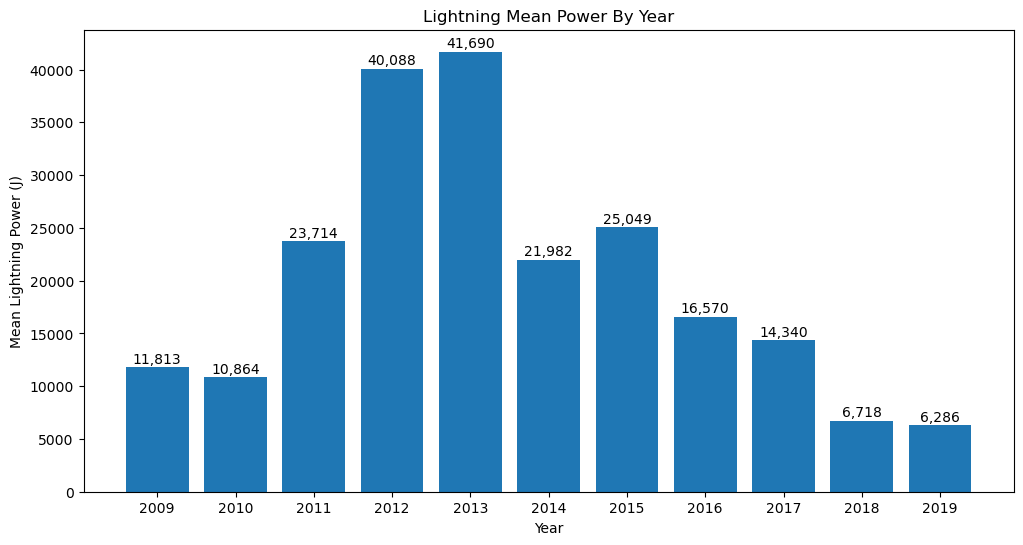

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

df['Date'] = pd.to_datetime(df['Date']).dt.year

df = df[df['Date']<2020]

df2 = df.groupby(['Date'], as_index=False).agg({'Power (J)': 'mean'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Date'], df2['Power (J)'], width = 0.8)

ax.set_xlabel('Year')
ax.set_ylabel('Mean Lightning Power (J)')
ax.set_title("Lightning Mean Power By Year")

ax.set_xticks(df2['Date'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height+100, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


In [94]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

import pandas as pd

# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df = df[df['Date'].dt.year<2020]

# Group by year and month
df_grouped = df.groupby(df['Date'].dt.to_period('M')).agg({'Power (J)': 'sum'})

# Flatten the column names
df_grouped.columns = [f'{col[0]}_{col[1]}' for col in df_grouped.columns]

# Reset the index to get "Year" and "Month" as separate columns
df_grouped = df_grouped.reset_index()

# Rename the "Date" column to "Month"
df2 = df_grouped.rename(columns={'Date': 'Month','P_o':'Sum'})

# Print the resulting dataframe
df2.to_csv("../CSVs and Graphs/Monthly Total Energy.csv",index=False)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")
df

,Date,Latitude,Longitude,Power (J)
0,2009/12/1,37.6420,4.9377,60484.92
1,2009/12/1,38.6991,8.3091,3046.67
2,2009/12/1,36.9608,4.2523,7787.19
3,2009/12/1,39.0087,5.9722,851.00
4,2009/12/1,37.3525,7.2369,5440.39
...,...,...,...,...
1360547,2022/1/25,32.2615,24.6026,12871.69
1360548,2022/1/25,35.7085,32.4864,23209.92
1360549,2022/1/25,34.8443,30.6639,1411.87
1360550,2022/1/25,32.4175,30.6500,1437.48


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")


# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Define the power bins
bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, float('inf')]
labels = ['0-0.5m', '0.5-1m', '1-1.5m', '1.5-2m', '2-2.5m', '>2.5m']

# Create a new column with the power bin labels
df['Power Bin'] = pd.cut(df['Power (J)'], bins=bins, labels=labels)

# Group the data by year and power bins and count the number of lightnings
grouped_df = df.groupby(['Year', 'Power Bin']).size().unstack(fill_value=0)

grouped_df = grouped_df.reset_index()
grouped_df.columns = grouped_df.columns.map(lambda x: f'{x[0]}_{x[1]}' if isinstance(x, tuple) else x)

# Print the resulting dataframe
grouped_df

#grouped_df.to_csv("power bins by year.csv",index=False)




Power Bin,Year,0-0.5m,0.5-1m,1-1.5m,1.5-2m,2-2.5m,>2.5m
0,2009,27387,2,0,0,0,0
1,2010,37663,19,1,1,0,0
2,2011,69068,197,60,16,6,16
3,2012,86325,823,128,37,13,17
4,2013,93411,911,256,90,54,48
5,2014,200296,704,172,61,36,47
6,2015,153285,917,176,41,21,23
7,2016,105038,385,63,26,10,10
8,2017,105030,280,30,11,7,8
9,2018,112560,50,8,0,1,1


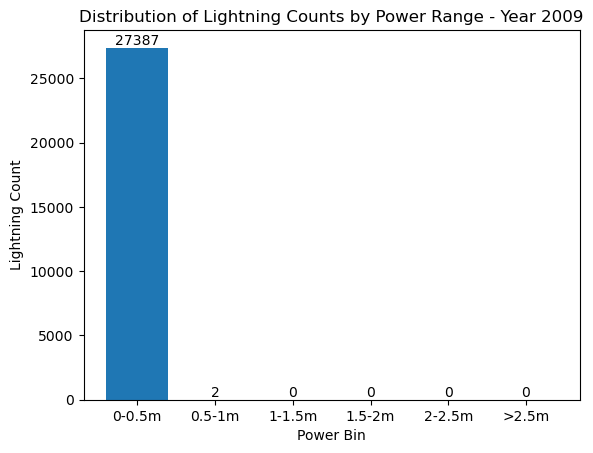

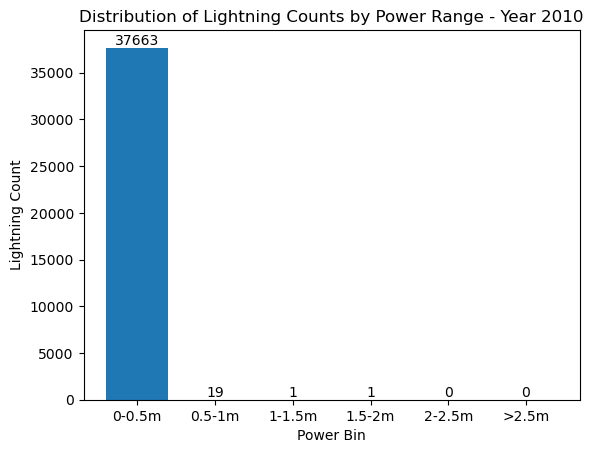

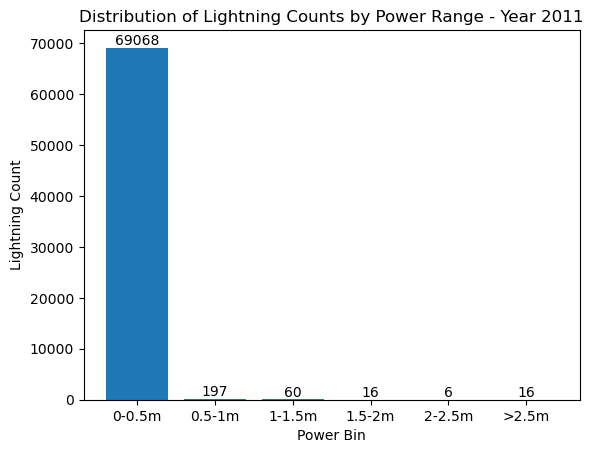

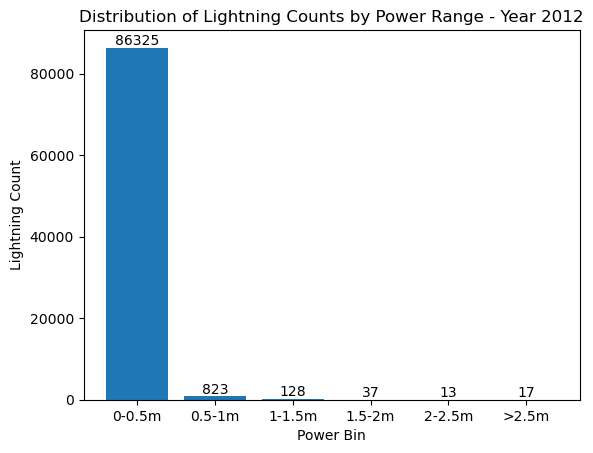

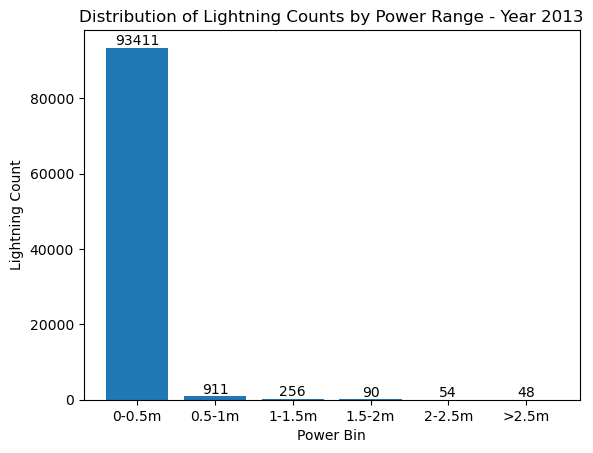

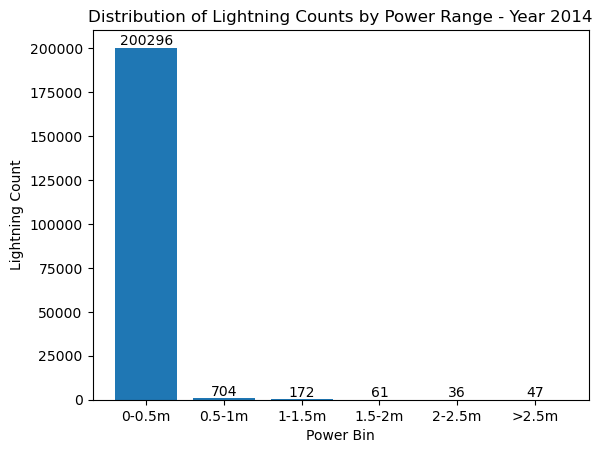

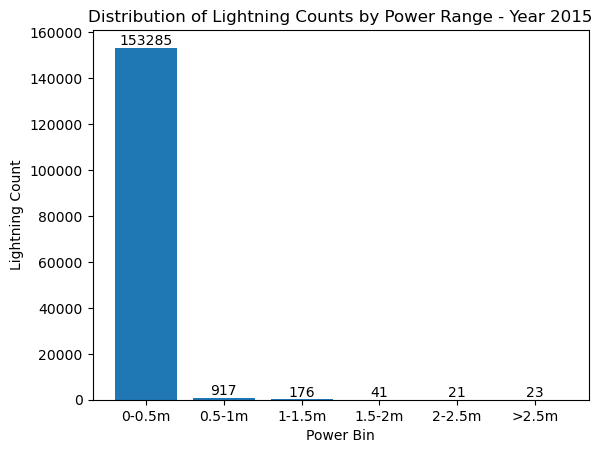

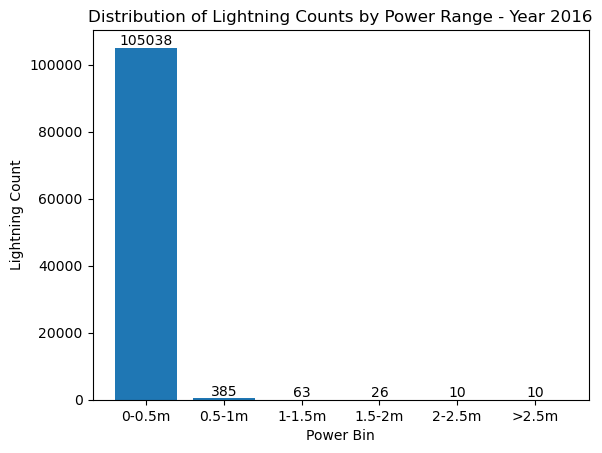

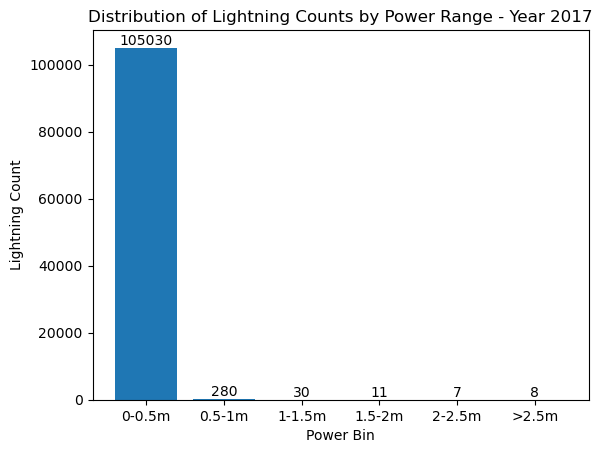

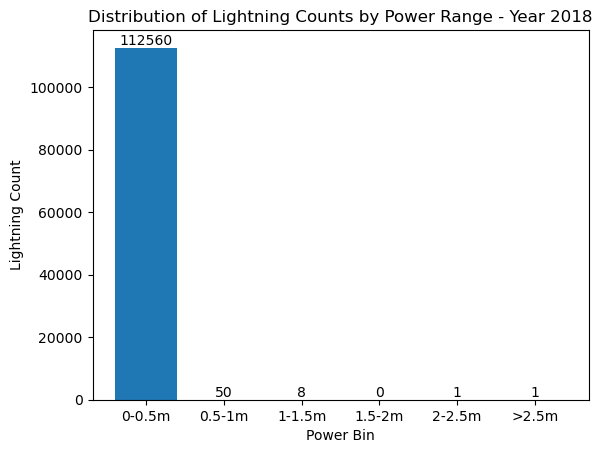

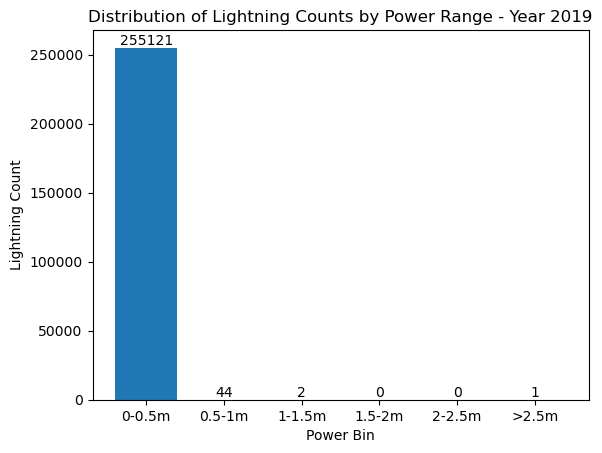

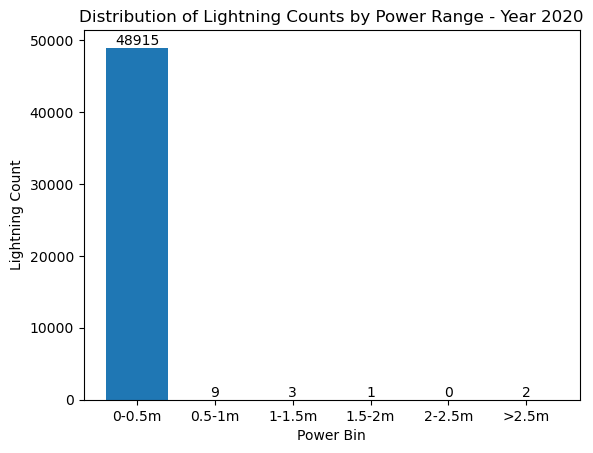

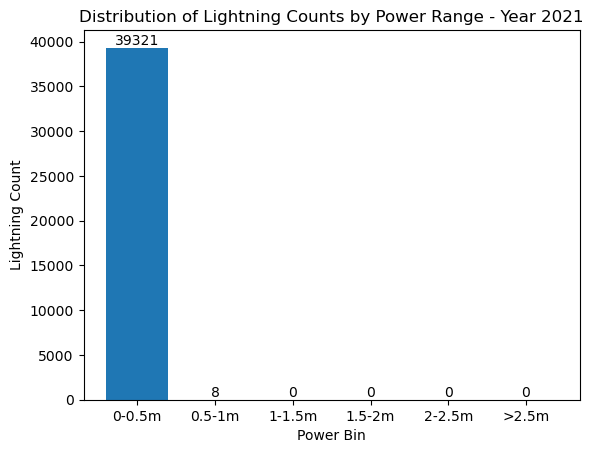

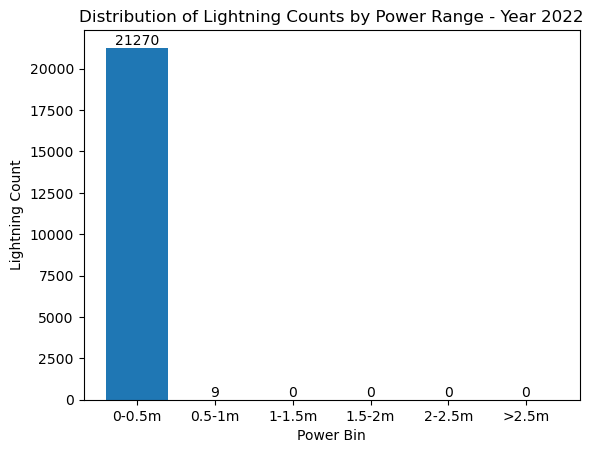

In [4]:
import matplotlib.pyplot as plt

# Iterate over each year
for year in grouped_df.index:
    # Get the lightning counts and power bins for the current year
    counts = grouped_df.loc[year].values[1:]
    power_bins = grouped_df.columns[1:]
    
    # Plot the histogram for the current year
    plt.figure()
    plt.bar(power_bins, counts)
    
    # Add annotations to each bar
    for i, count in enumerate(counts):
        plt.text(i, count, str(count), ha='center', va='bottom')
    
    # Set the labels and title for the current year's plot
    plt.xlabel('Power Bin')
    plt.ylabel('Lightning Count')
    plt.title(f'Distribution of Lightning Counts by Power Range - Year {year+2009}')
    
    # Show the plot for the current year
    plt.savefig(f'../yearly kde/Yearly Lightnings by Range {year+2009}.png', dpi=300)



C:\Users\chefi\AppData\Local\Temp\ipykernel_5180\163904286.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df2['Month'], rotation=90)


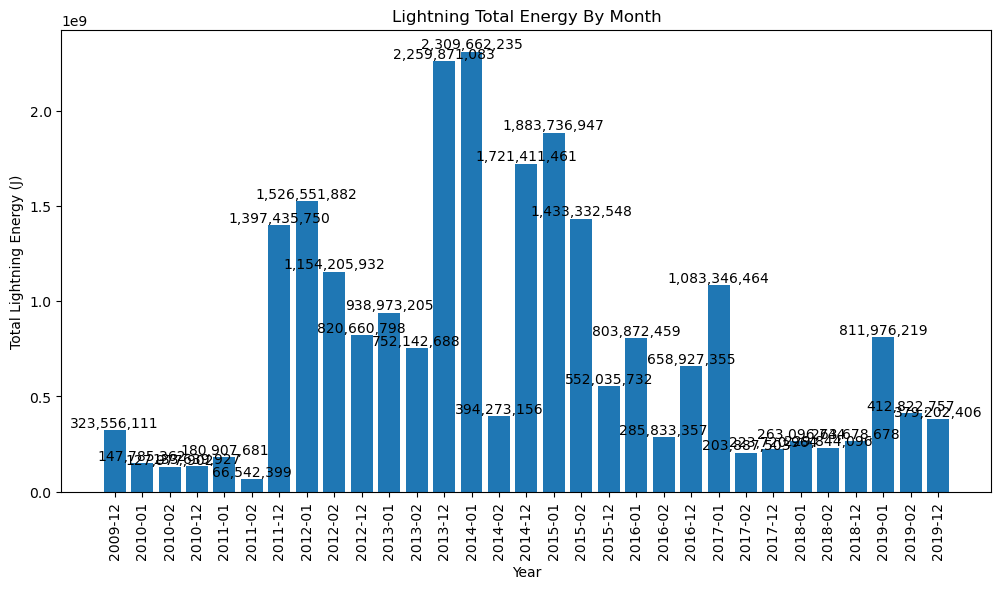

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

df['Date'] = pd.to_datetime(df['Date'])

df = df[df['Date'].dt.year<2020]

# Group by year and month
df_grouped = df.groupby(df['Date'].dt.to_period('M')).agg({'Power (J)': 'sum'})

# Flatten the column names
df_grouped.columns = [f'{col[0]}_{col[1]}' for col in df_grouped.columns]

# Reset the index to get "Year" and "Month" as separate columns
df_grouped = df_grouped.reset_index()

# Rename the "Date" column to "Month"
df2 = df_grouped.rename(columns={'Date': 'Month','P_o':'sum'})

df2['Month'] = df2['Month'].astype(str)

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Month'], df2['sum'], width = 0.8)

ax.set_xlabel('Year')
ax.set_ylabel('Total Lightning Energy (J)')
ax.set_title("Lightning Total Energy By Month")

ax.set_xticklabels(df2['Month'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height+100, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

import pandas as pd

# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df = df[df['Date'].dt.year<2020]

# Group by year and month
df_grouped = df.groupby(df['Date'].dt.to_period('Y')).agg({'Power (J)': ['count']})

# Flatten the column names
df_grouped.columns = [f'{col[0]}_{col[1]}' for col in df_grouped.columns]

# Reset the index to get "Year" and "Month" as separate columns
df_grouped = df_grouped.reset_index()

# Rename the "Date" column to "Month"
df2 = df_grouped.rename(columns={'Date': 'Month','Power (J)_count':'count'})

# Print the resulting dataframe
df2.to_csv("../CSVs and Graphs/Yearly Frequency.csv",index=False)


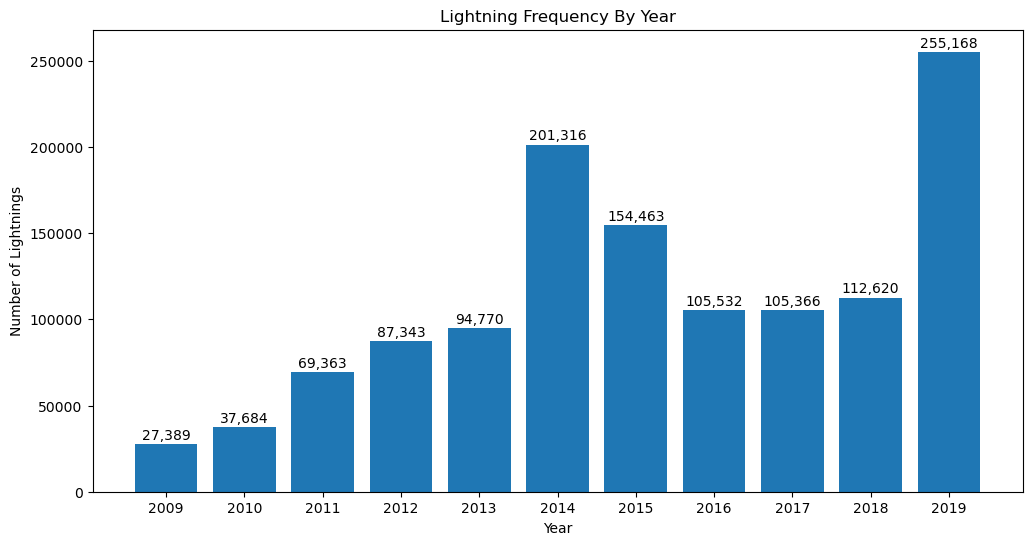

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

df['Date'] = pd.to_datetime(df['Date']).dt.year

df = df[df['Date']<2020]


df2 = df.groupby(['Date'], as_index=False).agg({'Power (J)': 'count'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Date'], df2['Power (J)'], width = 0.8)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Lightnings')
ax.set_title("Lightning Frequency By Year")

ax.set_xticks(df2['Date'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height+1000, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


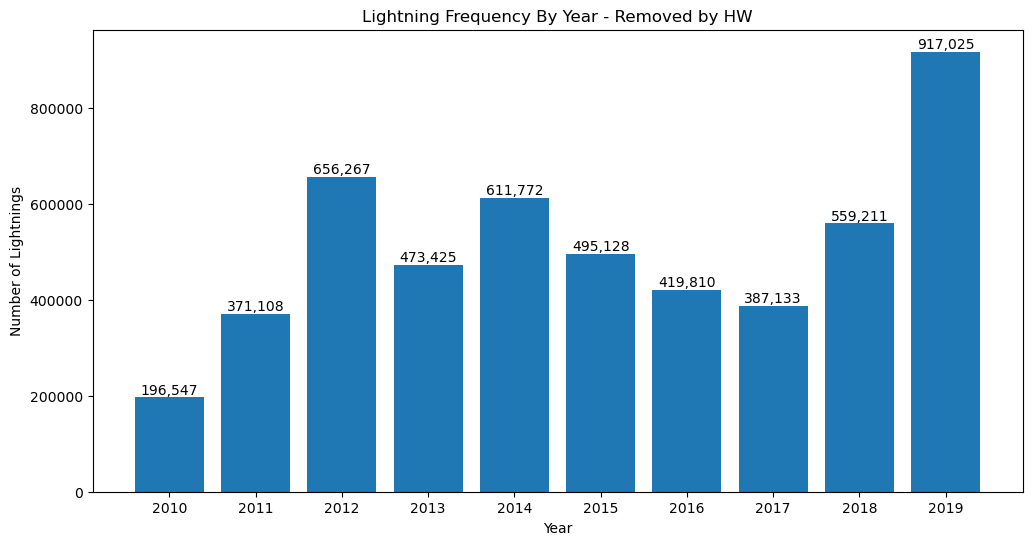

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../relevant csvs/Mediterranean cleared by HW.csv")

df['Date'] = pd.to_datetime(df['Date']).dt.year

df = df[df['Date']<2020]


df2 = df.groupby(['Date'], as_index=False).agg({'Power (J)': 'count'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Date'], df2['Power (J)'], width = 0.8)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Lightnings')
ax.set_title("Lightning Frequency By Year - Removed by HW")

ax.set_xticks(df2['Date'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height+1000, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


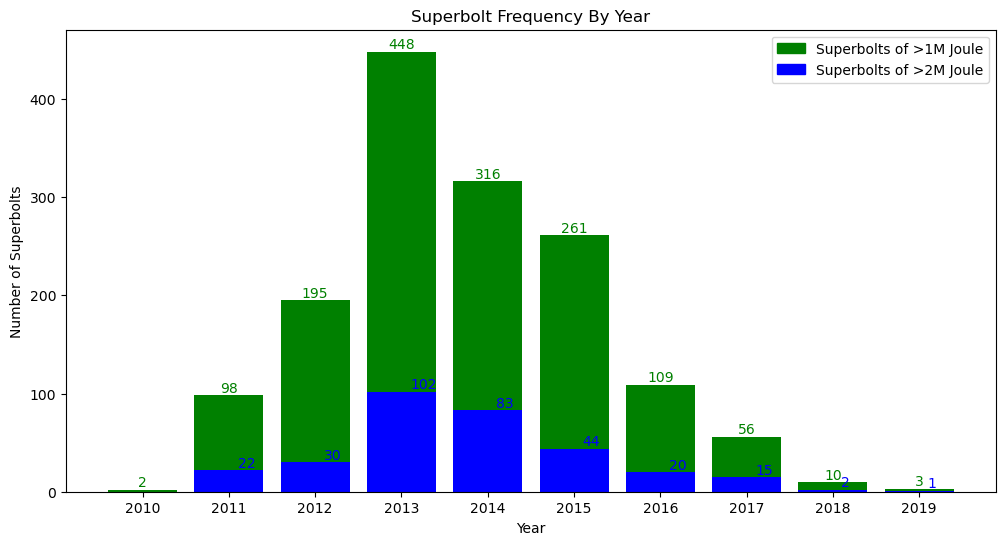

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

df['Date'] = pd.to_datetime(df['Date']).dt.year

df = df[df['Date']<2020]

df3 = df[df['Power (J)']>1000000]
#df3 = df3[df3['Power (J)']<2000000]
df4 = df[df['Power (J)']>2000000]

df2 = df3.groupby(['Date'], as_index=False).agg({'Power (J)': 'count'})
df5 = df4.groupby(['Date'], as_index=False).agg({'Power (J)': 'count'})


# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Date'], df2['Power (J)'], width = 0.8, color="Green")
bar2 = ax.bar(df5['Date'], df5['Power (J)'], width = 0.8, color="Blue")

ax.set_xlabel('Year')
ax.set_ylabel('Number of Superbolts')
ax.set_title("Superbolt Frequency By Year")

ax.set_xticks(df2['Date'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.0f'), ha='center', va='bottom', fontsize=10, color="Green")

for rect in bar2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0 + 0.1, height, format(height, ',.0f'), ha='left', va='bottom', fontsize=10, color="Blue")

blue_patch = plt.Rectangle((0, 0), 1, 1, color="Green")

red_patch = plt.Rectangle((0, 0), 1, 1,color="Blue")
plt.legend([blue_patch, red_patch], ['Superbolts of >1M Joule', 'Superbolts of >2M Joule'], loc='upper right')

plt.show()


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

import pandas as pd

# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df = df[df['Date'].dt.year<2020]

# Group by year and month
df_grouped = df.groupby(df['Date'].dt.to_period('M')).agg({'Power (J)': ['count']})

# Flatten the column names
df_grouped.columns = [f'{col[0]}_{col[1]}' for col in df_grouped.columns]

# Reset the index to get "Year" and "Month" as separate columns
df_grouped = df_grouped.reset_index()

# Rename the "Date" column to "Month"
df2 = df_grouped.rename(columns={'Date': 'Month','Power (J)_count':'count'})

# Print the resulting dataframe
df2.to_csv("../CSVs and Graphs/Monthly Frequency.csv",index=False)


C:\Users\chefi\AppData\Local\Temp\ipykernel_5180\949213216.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df2['Month'], rotation=90)


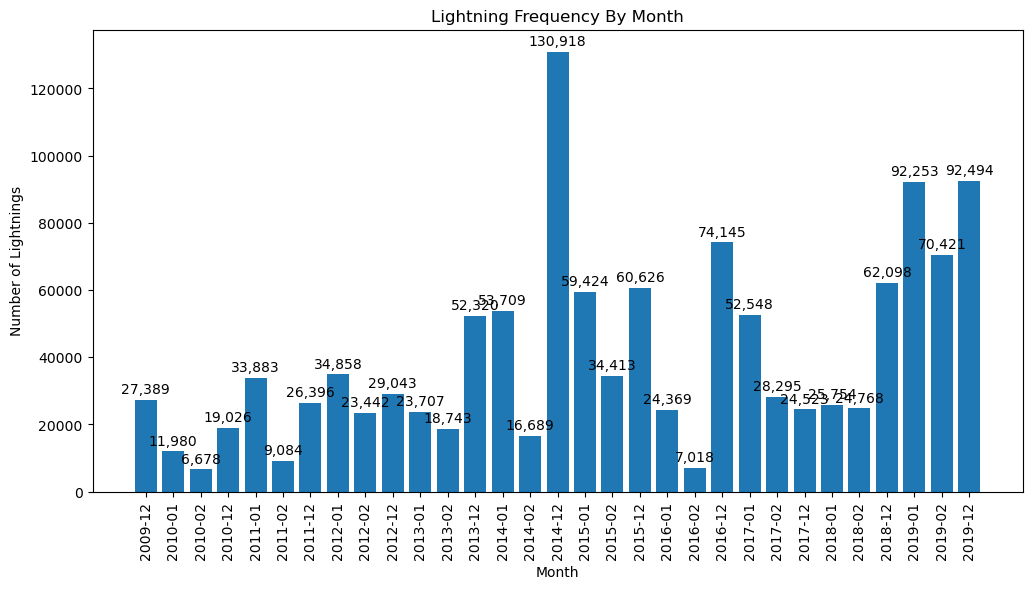

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

df['Date'] = pd.to_datetime(df['Date'])

df = df[df['Date'].dt.year<2020]

# Group by year and month
df_grouped = df.groupby(df['Date'].dt.to_period('M')).agg({'Power (J)': ['count']})

# Flatten the column names
df_grouped.columns = [f'{col[0]}_{col[1]}' for col in df_grouped.columns]

# Reset the index to get "Year" and "Month" as separate columns
df_grouped = df_grouped.reset_index()

# Rename the "Date" column to "Month"
df2 = df_grouped.rename(columns={'Date': 'Month','Power (J)_count':'count'})

df2['Month'] = df2['Month'].astype(str)

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Month'], df2['count'], width = 0.8)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Lightnings')
ax.set_title("Lightning Frequency By Month")

ax.set_xticklabels(df2['Month'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height+1000, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


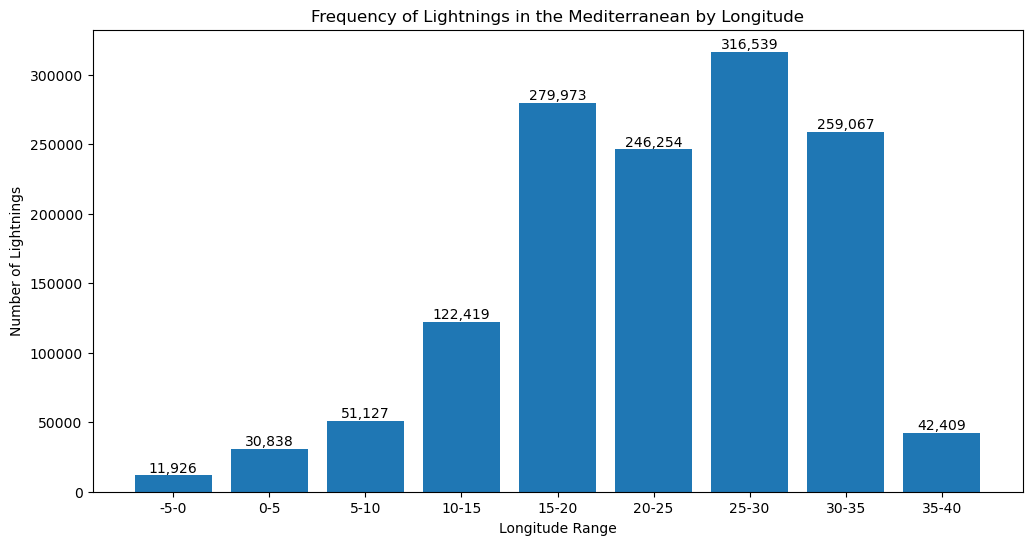

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

# Define the bin ranges for your groups
bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40]

# Define the labels for your groups
labels = ['-5-0','0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

# Create a new column in your DataFrame that assigns each lightning strike to a group based on "Longitude"
df['Longitude Group'] = pd.cut(df['Longitude'], bins=bins, labels=labels)

group_counts = df['Longitude Group'].value_counts()



# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(labels, group_counts[labels], width = 0.8)

ax.set_xlabel('Longitude Range')
ax.set_ylabel('Number of Lightnings')
ax.set_title('Frequency of Lightnings in the Mediterranean by Longitude')


for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


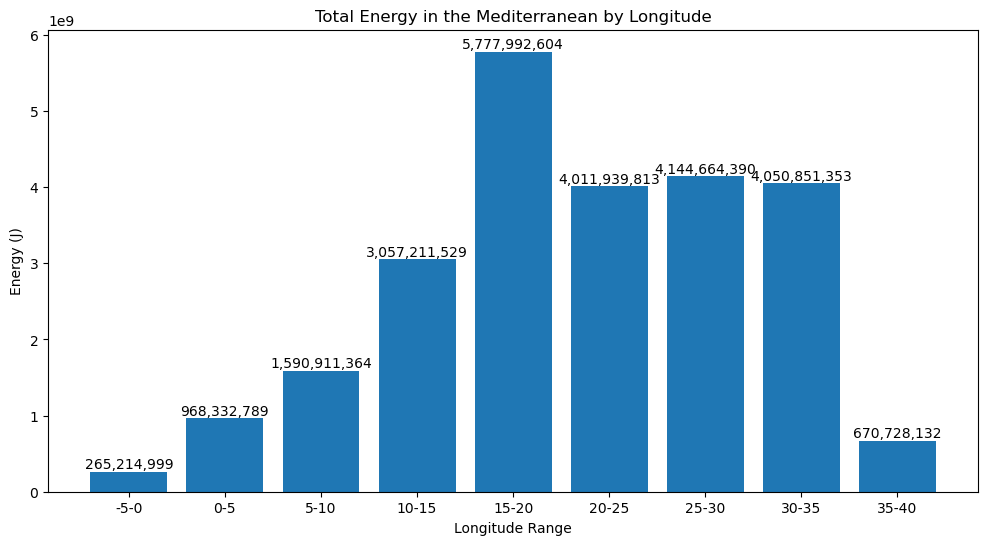

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

# Define the bin ranges for your groups
bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40]

# Define the labels for your groups
labels = ['-5-0','0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

# Create a new column in your DataFrame that assigns each lightning strike to a group based on "Longitude"
df['Longitude Group'] = pd.cut(df['Longitude'], bins=bins, labels=labels)

#group_counts = df['Longitude Group'].value_counts()
group_counts = df.groupby('Longitude Group')['Power (J)'].sum()


# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(labels, group_counts[labels], width = 0.8)

ax.set_xlabel('Longitude Range')
ax.set_ylabel('Energy (J)')
ax.set_title('Total Energy in the Mediterranean by Longitude')


for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


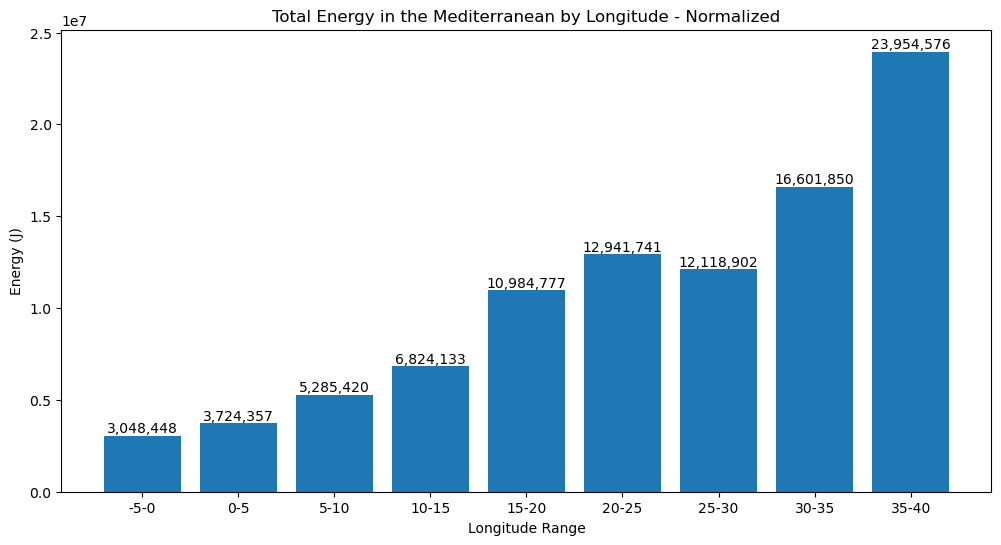

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

# Define the bin ranges for your groups
bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40]

# Define the labels for your groups
labels = ['-5-0','0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

# Create a new column in your DataFrame that assigns each lightning strike to a group based on "Longitude"
df['Longitude Group'] = pd.cut(df['Longitude'], bins=bins, labels=labels)

#group_counts = df['Longitude Group'].value_counts()
group_counts = df.groupby('Longitude Group')['Power (J)'].sum()
group_counts['-5-0'] = (group_counts['-5-0']/87)
group_counts['0-5'] = (group_counts['0-5']/260)
group_counts['5-10'] = (group_counts['5-10']/301)
group_counts['10-15'] = (group_counts['10-15']/448)
group_counts['15-20'] = (group_counts['15-20']/526)
group_counts['20-25'] = (group_counts['20-25']/310)
group_counts['25-30'] = (group_counts['25-30']/342)
group_counts['30-35'] = (group_counts['30-35']/244)
group_counts['35-40'] = (group_counts['35-40']/28)

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(labels, group_counts[labels], width = 0.8)

ax.set_xlabel('Longitude Range')
ax.set_ylabel('Energy (J)')
ax.set_title('Total Energy in the Mediterranean by Longitude - Normalized')


for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


In [77]:
group_counts.to_csv("../CSVs and Graphs/Normalized Lightning Freq by Longitude.csv")


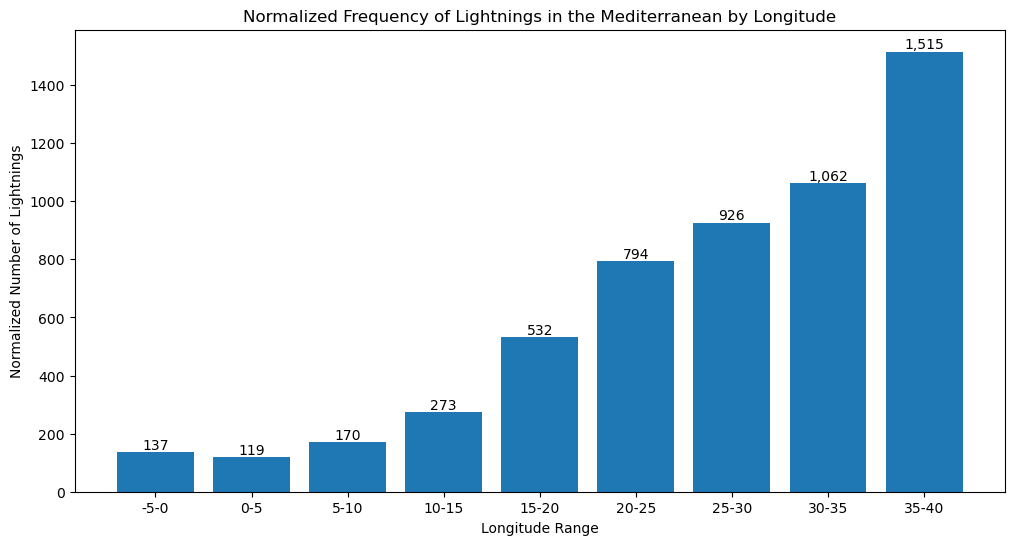

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")

# Define the bin ranges for your groups
bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40]

# Define the labels for your groups
labels = ['-5-0','0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

# Create a new column in your DataFrame that assigns each lightning strike to a group based on "Longitude"
df['Longitude Group'] = pd.cut(df['Longitude'], bins=bins, labels=labels)

group_counts = df['Longitude Group'].value_counts()

group_counts['-5-0'] = (group_counts['-5-0']/87)#/1514.607
group_counts['0-5'] = (group_counts['0-5']/260)#/1514.607
group_counts['5-10'] = (group_counts['5-10']/301)#/1514.607
group_counts['10-15'] = (group_counts['10-15']/448)#/1514.607
group_counts['15-20'] = (group_counts['15-20']/526)#/1514.607
group_counts['20-25'] = (group_counts['20-25']/310)#/1514.607
group_counts['25-30'] = (group_counts['25-30']/342)#/1514.607
group_counts['30-35'] = (group_counts['30-35']/244)#/1514.607
group_counts['35-40'] = (group_counts['35-40']/28)#/1514.607

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(labels, group_counts[labels], width = 0.8)

ax.set_xlabel('Longitude Range')
ax.set_ylabel('Normalized Number of Lightnings')
ax.set_title('Normalized Frequency of Lightnings in the Mediterranean by Longitude')


for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


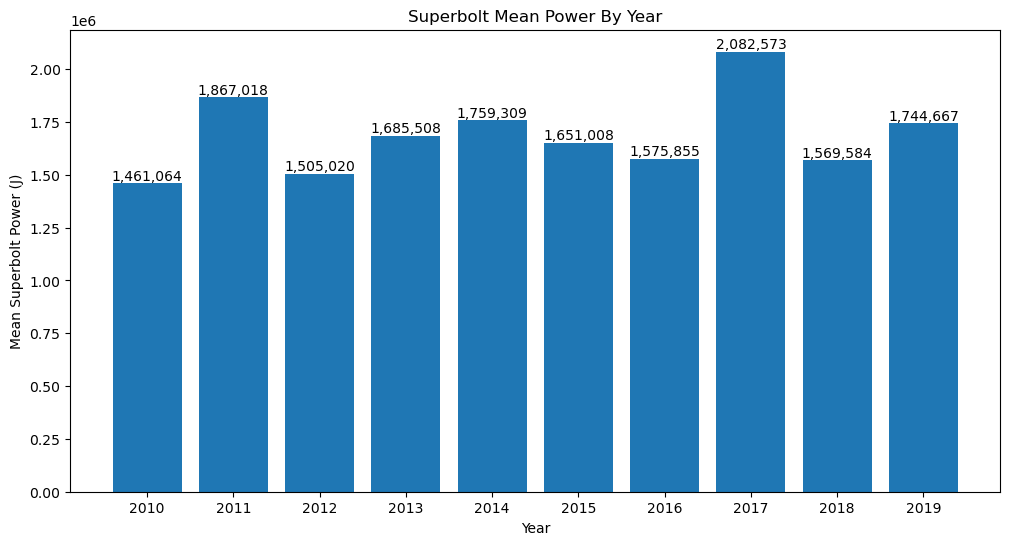

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean superbolts 2009-2021.csv")

df['Date'] = pd.to_datetime(df['Date']).dt.year

df = df[df['Date']<2020]

df2 = df.groupby(['Date'], as_index=False).agg({'Power (J)': 'mean'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Date'], df2['Power (J)'], width = 0.8)

ax.set_xlabel('Year')
ax.set_ylabel('Mean Superbolt Power (J)')
ax.set_title("Superbolt Mean Power By Year")

ax.set_xticks(df2['Date'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height+100, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


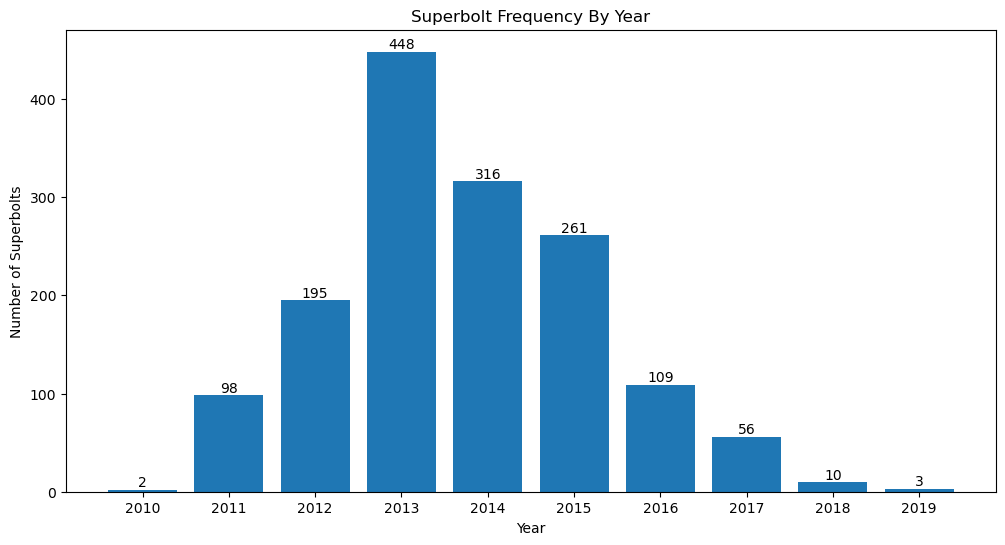

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean superbolts 2009-2021.csv")

df['Date'] = pd.to_datetime(df['Date']).dt.year

df = df[df['Date']<2020]


df2 = df.groupby(['Date'], as_index=False).agg({'Power (J)': 'count'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Date'], df2['Power (J)'], width = 0.8)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Superbolts')
ax.set_title("Superbolt Frequency By Year")

ax.set_xticks(df2['Date'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


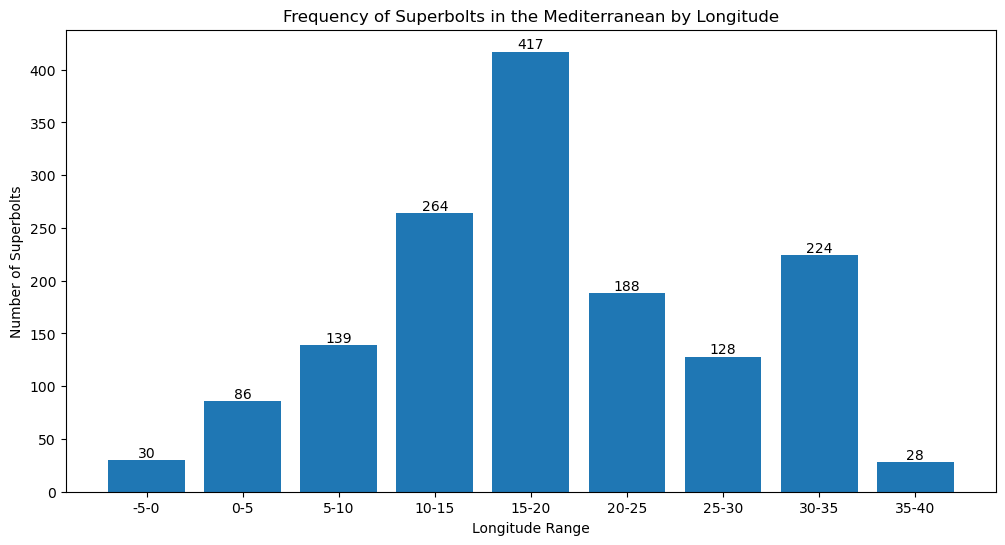

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean superbolts 2009-2021.csv")

# Define the bin ranges for your groups
bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40]

# Define the labels for your groups
labels = ['-5-0','0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

# Create a new column in your DataFrame that assigns each lightning strike to a group based on "Longitude"
df['Longitude Group'] = pd.cut(df['Longitude'], bins=bins, labels=labels)

group_counts = df['Longitude Group'].value_counts()


# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(labels, group_counts[labels], width = 0.8)

ax.set_xlabel('Longitude Range')
ax.set_ylabel('Number of Superbolts')
ax.set_title('Frequency of Superbolts in the Mediterranean by Longitude')


for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


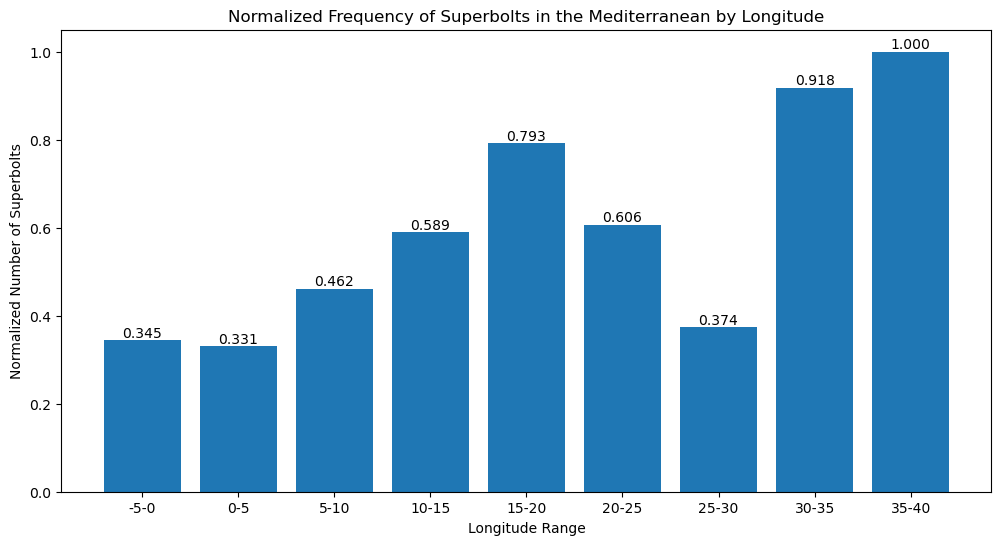

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean superbolts 2009-2021.csv")

# Define the bin ranges for your groups
bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40]

# Define the labels for your groups
labels = ['-5-0','0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

# Create a new column in your DataFrame that assigns each lightning strike to a group based on "Longitude"
df['Longitude Group'] = pd.cut(df['Longitude'], bins=bins, labels=labels)

group_counts = df['Longitude Group'].value_counts()

group_counts['-5-0'] = group_counts['-5-0']/87
group_counts['0-5'] = group_counts['0-5']/260
group_counts['5-10'] = group_counts['5-10']/301
group_counts['10-15'] = group_counts['10-15']/448
group_counts['15-20'] = group_counts['15-20']/526
group_counts['20-25'] = group_counts['20-25']/310
group_counts['25-30'] = group_counts['25-30']/342
group_counts['30-35'] = group_counts['30-35']/244
group_counts['35-40'] = group_counts['35-40']/28


# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(labels, group_counts[labels], width = 0.8)

ax.set_xlabel('Longitude Range')
ax.set_ylabel('Normalized Number of Superbolts')
ax.set_title('Normalized Frequency of Superbolts in the Mediterranean by Longitude')


for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.3f'), ha='center', va='bottom', fontsize=10)

plt.show()


In [13]:
group_counts['-5-0'] = group_counts['-5-0']/0.087
group_counts['0-5'] = group_counts['0-5']/0.260
group_counts['5-10'] = group_counts['5-10']/0.301
group_counts['10-15'] = group_counts['10-15']/0.448
group_counts['15-20'] = group_counts['15-20']/0.526
group_counts['20-25'] = group_counts['20-25']/0.310
group_counts['25-30'] = group_counts['25-30']/0.342
group_counts['30-35'] = group_counts['30-35']/0.244
group_counts['35-40'] = group_counts['35-40']/0.028


In [ ]:
#There is a surface area bias to this histogram
8761118 

26026910 
30193094 
44885575 
52628801 
31025764 
34254062 
24468472 
2804069 

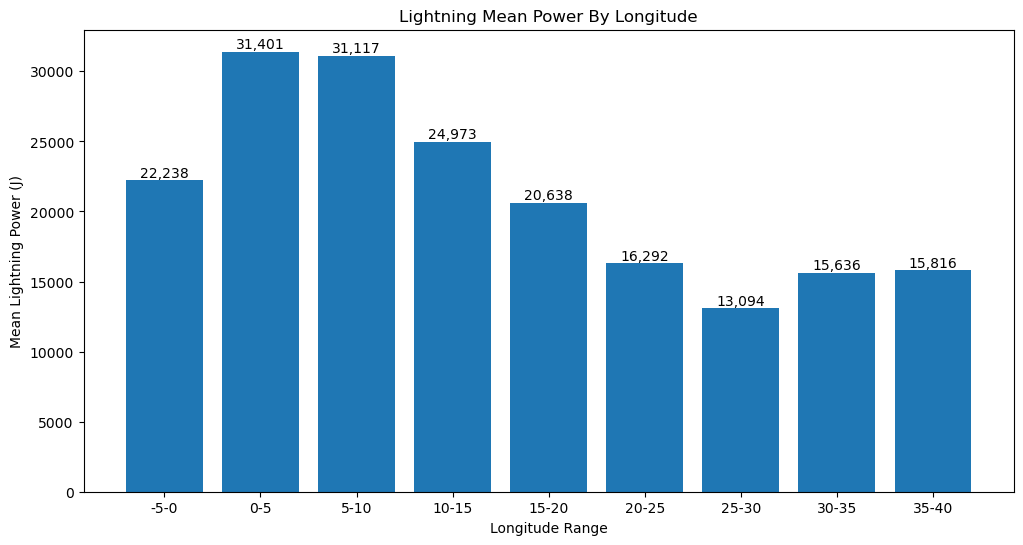

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean Lightnings 2009-2021.csv")

# Define the bin ranges for your groups
bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40]

# Define the labels for your groups
labels = ['-5-0','0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

# Create a new column in your DataFrame that assigns each lightning strike to a group based on "Longitude"
df['Longitude Group'] = pd.cut(df['Longitude'], bins=bins, labels=labels)

df2 = df.groupby(['Longitude Group'], as_index=False).agg({'Power (J)': 'mean'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2["Longitude Group"], df2["Power (J)"], width = 0.8)

ax.set_xlabel('Longitude Range')
ax.set_ylabel('Mean Lightning Power (J)')
ax.set_title("Lightning Mean Power By Longitude")

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.0f'), ha='center', va='bottom', fontsize=10)

plt.show()


In [82]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/mediterranean Lightnings 2009-2021.csv")

# Define the bin ranges for your groups
bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40]

# Define the labels for your groups
labels = ['-5-0','0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

# Create a new column in your DataFrame that assigns each lightning strike to a group based on "Longitude"
df['Longitude Group'] = pd.cut(df['Longitude'], bins=bins, labels=labels)

df2 = df.groupby(['Longitude Group'], as_index=False).agg({'Power (J)': 'mean'})

df2.to_csv("../csvs and graphs/Mean Power by Longitude.csv")

In [ ]:
#The significances of these means differ

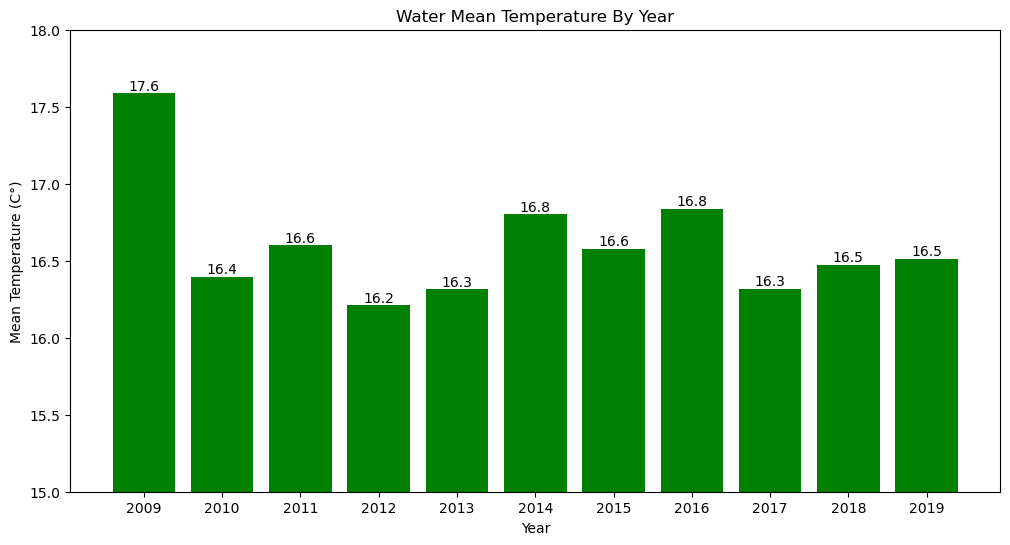

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/Temperature 2009-2021.csv")

df['Month'] = (df['Month'].str.slice(stop=-3)).astype(int)

df = df[df['Month']<2020]

df2 = df.groupby(['Month'], as_index=False).agg({'Temperature': 'mean'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Month'], df2['Temperature'], width = 0.8, color="green")

ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (C°)')
ax.set_title("Water Mean Temperature By Year")
ax.set_ylim([15,18])

ax.set_xticks(df2['Month'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, '.1f'), ha='center', va='bottom', fontsize=10)

plt.show()


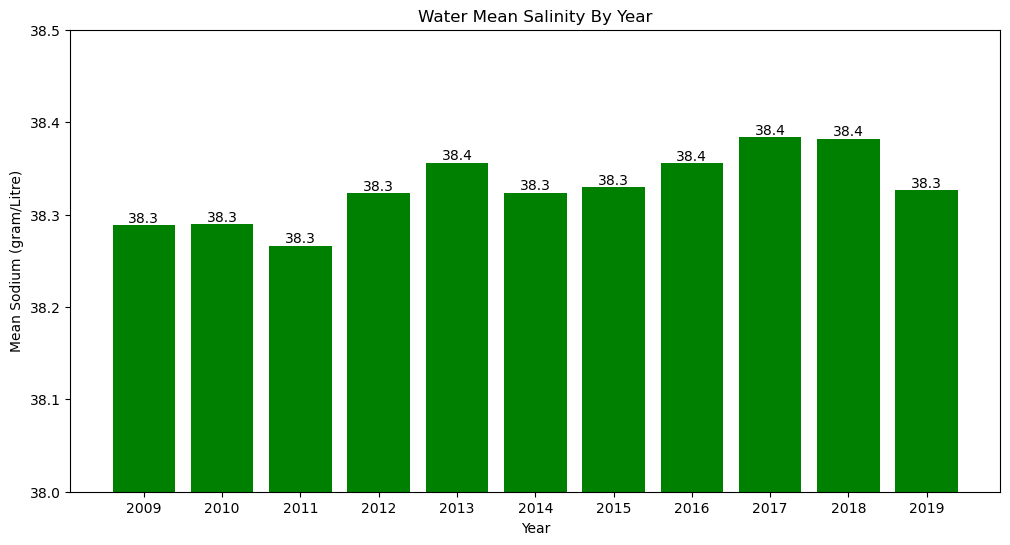

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/Salinity 2009-2021.csv")

df['Month'] = (df['Month'].str.slice(stop=-3)).astype(int)

df = df[df['Month']<2020]

df2 = df.groupby(['Month'], as_index=False).agg({'Sodium': 'mean'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Month'], df2['Sodium'], width = 0.8, color="green")

ax.set_xlabel('Year')
ax.set_ylabel('Mean Sodium (gram/Litre)')
ax.set_title("Water Mean Salinity By Year")
ax.set_ylim([38,38.5])

ax.set_xticks(df2['Month'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.1f'), ha='center', va='bottom', fontsize=10)

plt.show()


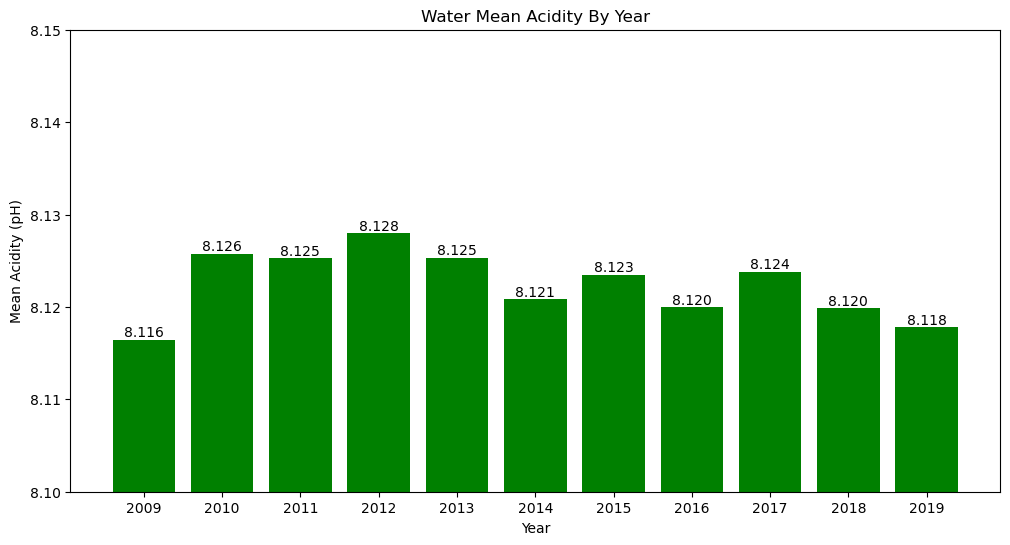

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/Acidity 2009-2021.csv")

df['Month'] = (df['Month'].str.slice(stop=-3)).astype(int)

df = df[df['Month']<2020]

df2 = df.groupby(['Month'], as_index=False).agg({'pH': 'mean'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Month'], df2['pH'], width = 0.8, color="green")

ax.set_xlabel('Year')
ax.set_ylabel('Mean Acidity (pH)')
ax.set_title("Water Mean Acidity By Year")
ax.set_ylim([8.1,8.15])

ax.set_xticks(df2['Month'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.3f'), ha='center', va='bottom', fontsize=10)

plt.show()


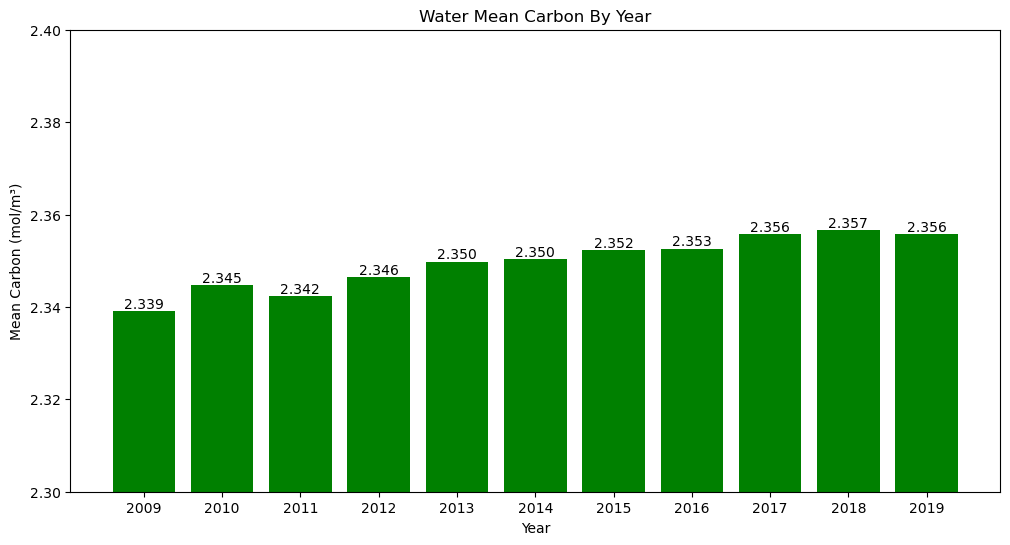

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/Carbon 2009-2021.csv")

df['Month'] = (df['Month'].str.slice(stop=-3)).astype(int)

df = df[df['Month']<2020]

df2 = df.groupby(['Month'], as_index=False).agg({'Carbon': 'mean'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Month'], df2['Carbon'], width = 0.8, color="green")

ax.set_xlabel('Year')
ax.set_ylabel('Mean Carbon (mol/m³)')
ax.set_title("Water Mean Carbon By Year")
ax.set_ylim([2.3,2.4])

ax.set_xticks(df2['Month'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.3f'), ha='center', va='bottom', fontsize=10)

plt.show()


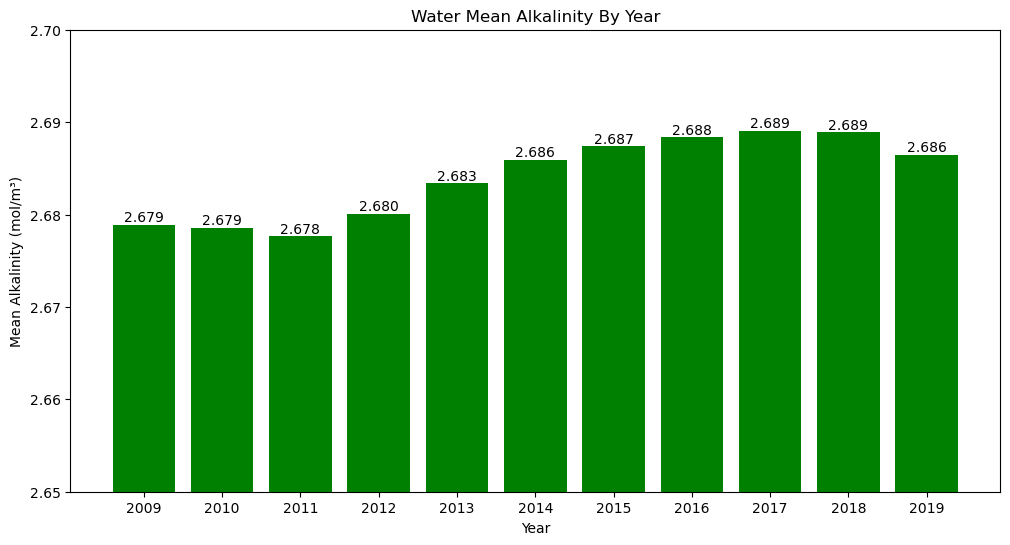

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../postprocessed/Alkalinity 2009-2021.csv")

df['Month'] = (df['Month'].str.slice(stop=-3)).astype(int)

df = df[df['Month']<2020]

df2 = df.groupby(['Month'], as_index=False).agg({'Alkalinity': 'mean'})

# Create a bar histogram using matplotlib

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df2['Month'], df2['Alkalinity'], width = 0.8, color="green")

ax.set_xlabel('Year')
ax.set_ylabel('Mean Alkalinity (mol/m³)')
ax.set_title("Water Mean Alkalinity By Year")
ax.set_ylim([2.65,2.7])

ax.set_xticks(df2['Month'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.3f'), ha='center', va='bottom', fontsize=10)

plt.show()


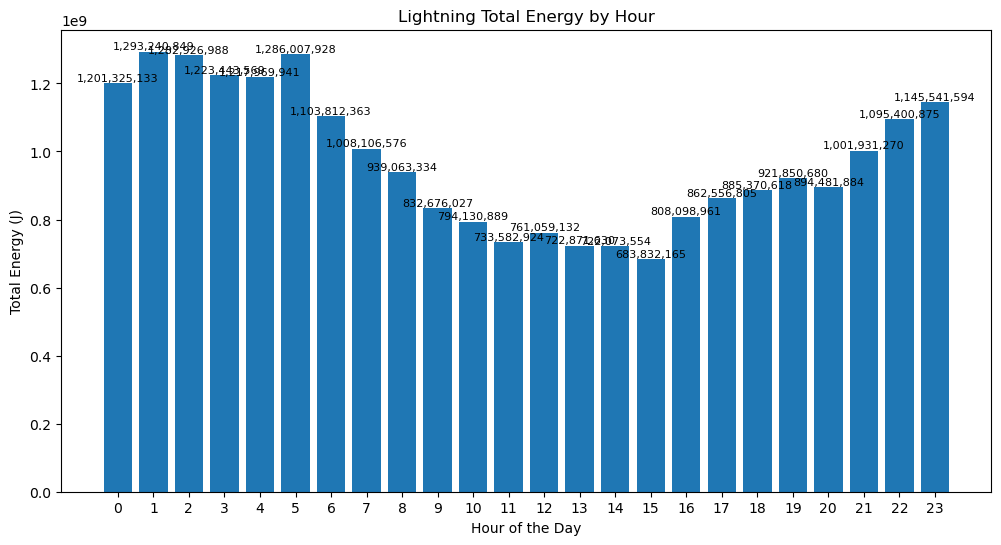

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../relevant csvs/hourly lightning metrics.csv")

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(df['Hour'], df['Total Power (J)'], width = 0.8)

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Energy (J)')
ax.set_title("Lightning Total Energy by Hour")
#ax.set_ylim([2.65,2.7])

ax.set_xticks(df['Hour'], rotation=90)

for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ',.0f'), ha='center', va='bottom', fontsize=8)

plt.show()


In [7]:
df = pd.read_csv("../relevant csvs/hourly lightning metrics with year.csv")
df

,Year,Hour,Count,Mean Power (J),Total Power (J)
0,2010,0,2761,8580.582159,23690987.34
1,2010,1,3160,7871.394247,24873605.82
2,2010,2,3068,7329.407484,22486622.16
3,2010,3,2509,9069.649900,22755751.60
4,2010,4,1660,13061.980428,21682887.51
...,...,...,...,...,...
235,2019,19,10320,7438.766794,76768073.31
236,2019,20,9748,7504.683674,73155656.45
237,2019,21,10362,7663.028777,79404304.19
238,2019,22,10460,7813.233799,81726425.54


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# read in the dataframe
df = pd.read_csv("../relevant csvs/hourly tec.csv")

# group the dataframe by "Year"
grouped_df2 = df.groupby(['period','Hour'], as_index=False).agg({'tecUHR': 'mean'})
grouped_df2

,period,Hour,tecUHR
0,2009-2010,0,8.613058
1,2009-2010,1,8.346726
2,2009-2010,2,8.442001
3,2009-2010,3,8.785082
4,2009-2010,4,9.153683
...,...,...,...
259,2019-2020,19,8.616837
260,2019-2020,20,8.183865
261,2019-2020,21,8.120791
262,2019-2020,22,7.832653


In [21]:
grouped_df2.to_csv("../Hourly TEC/Hourly TEC by Period.csv",index=False)

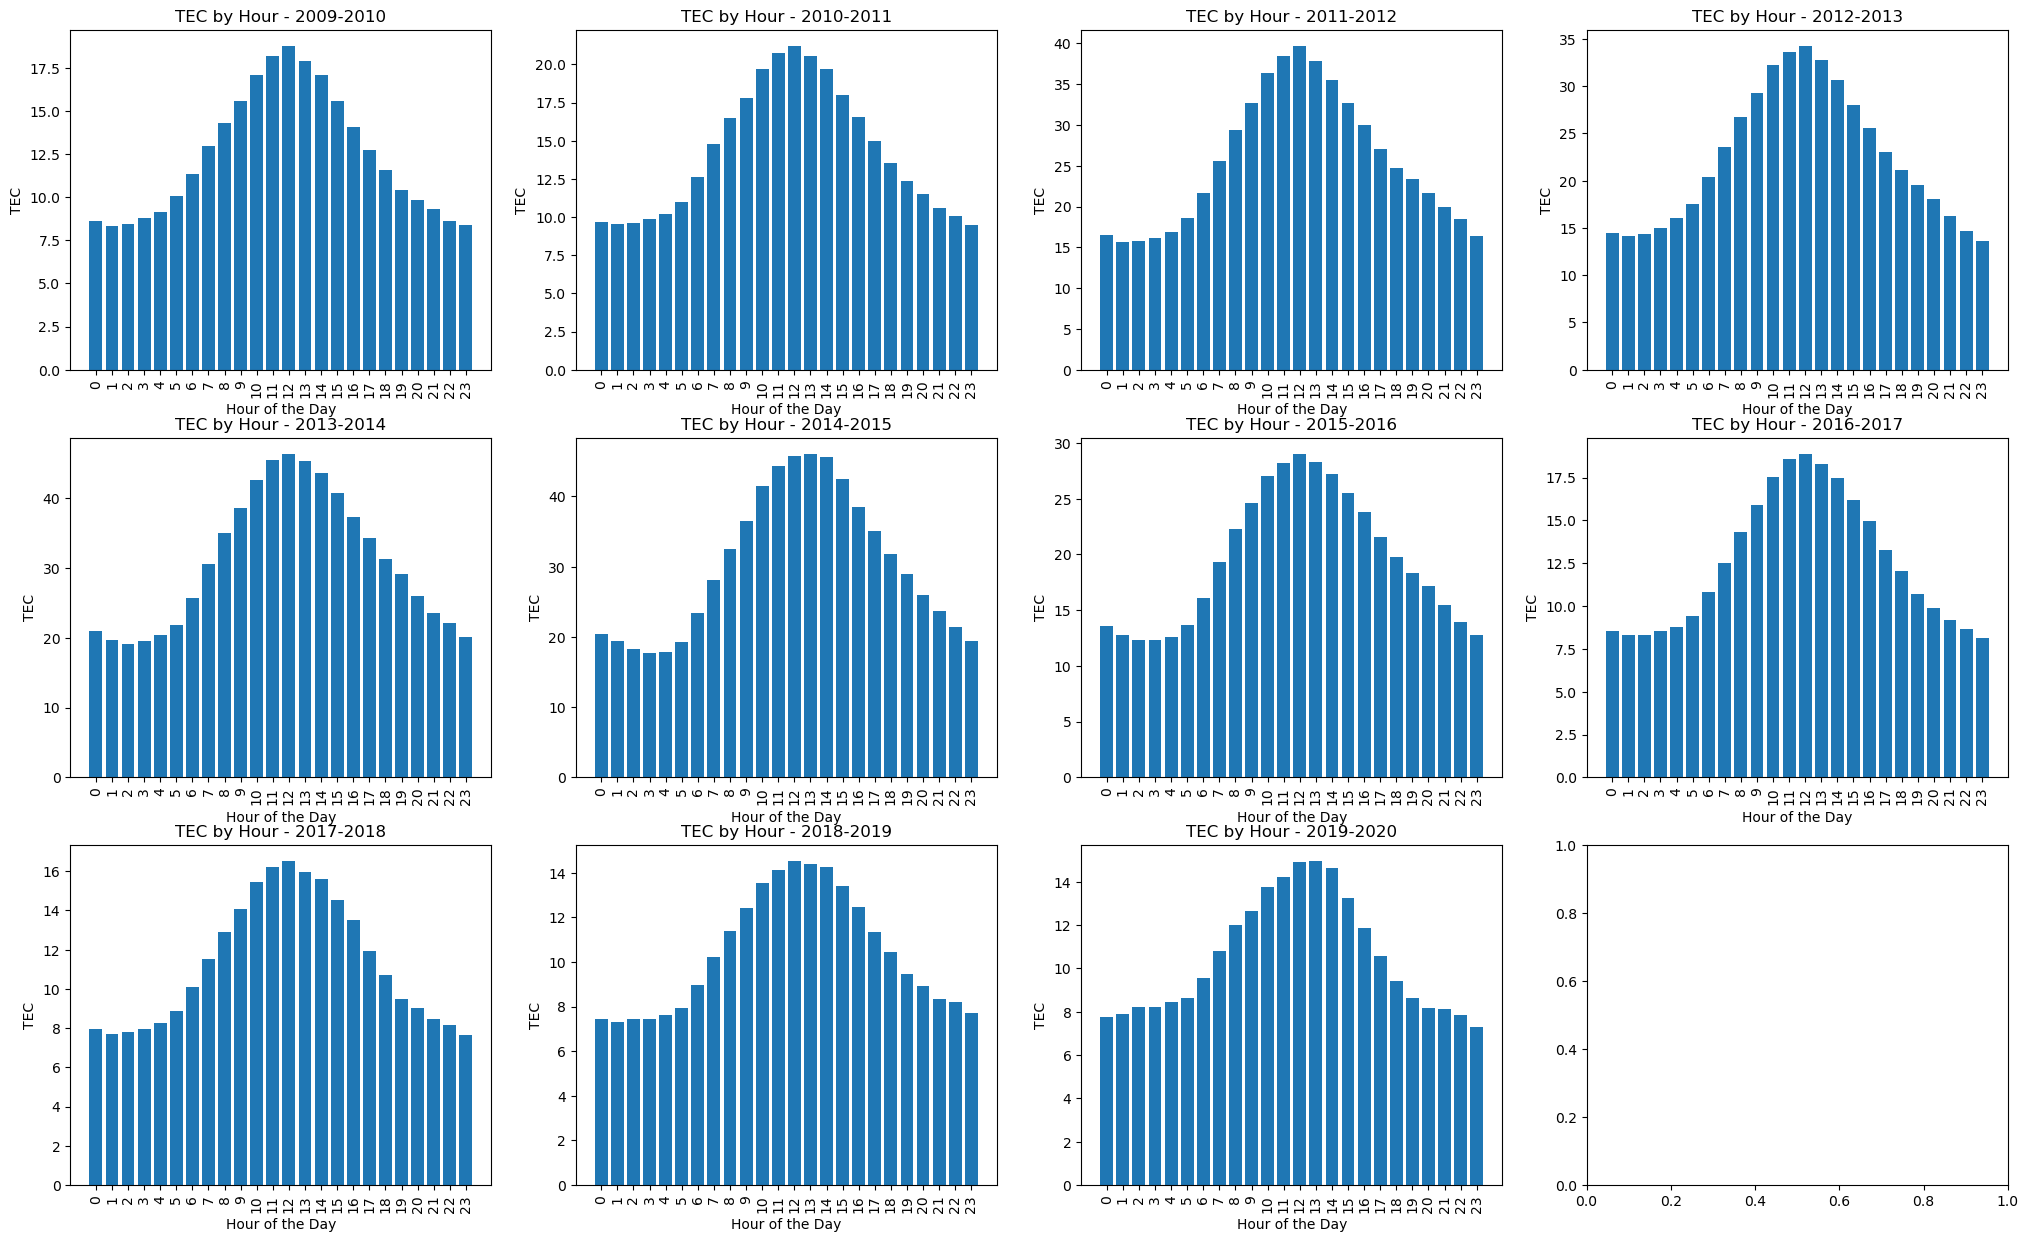

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# read in the dataframe
df = pd.read_csv("../relevant csvs/hourly lightning metrics with year.csv")

# group the dataframe by "Year"
grouped_df = grouped_df2.groupby("period")

# calculate the number of rows and columns needed for the grid layout
num_groups = len(grouped_df)
num_cols = math.ceil(math.sqrt(num_groups))
num_rows = math.ceil(num_groups / num_cols)

# create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 15))

# loop over each group and create a subplot
for i, (period, group) in enumerate(grouped_df):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.bar(group["Hour"], group["tecUHR"], width=0.8)
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('TEC')
    ax.set_title(f"TEC by Hour - {period}")
    ax.set_xticks(group['Hour'])
    ax.tick_params(axis='x', rotation=90)

# adjust the layout and save the figure
plt.show()


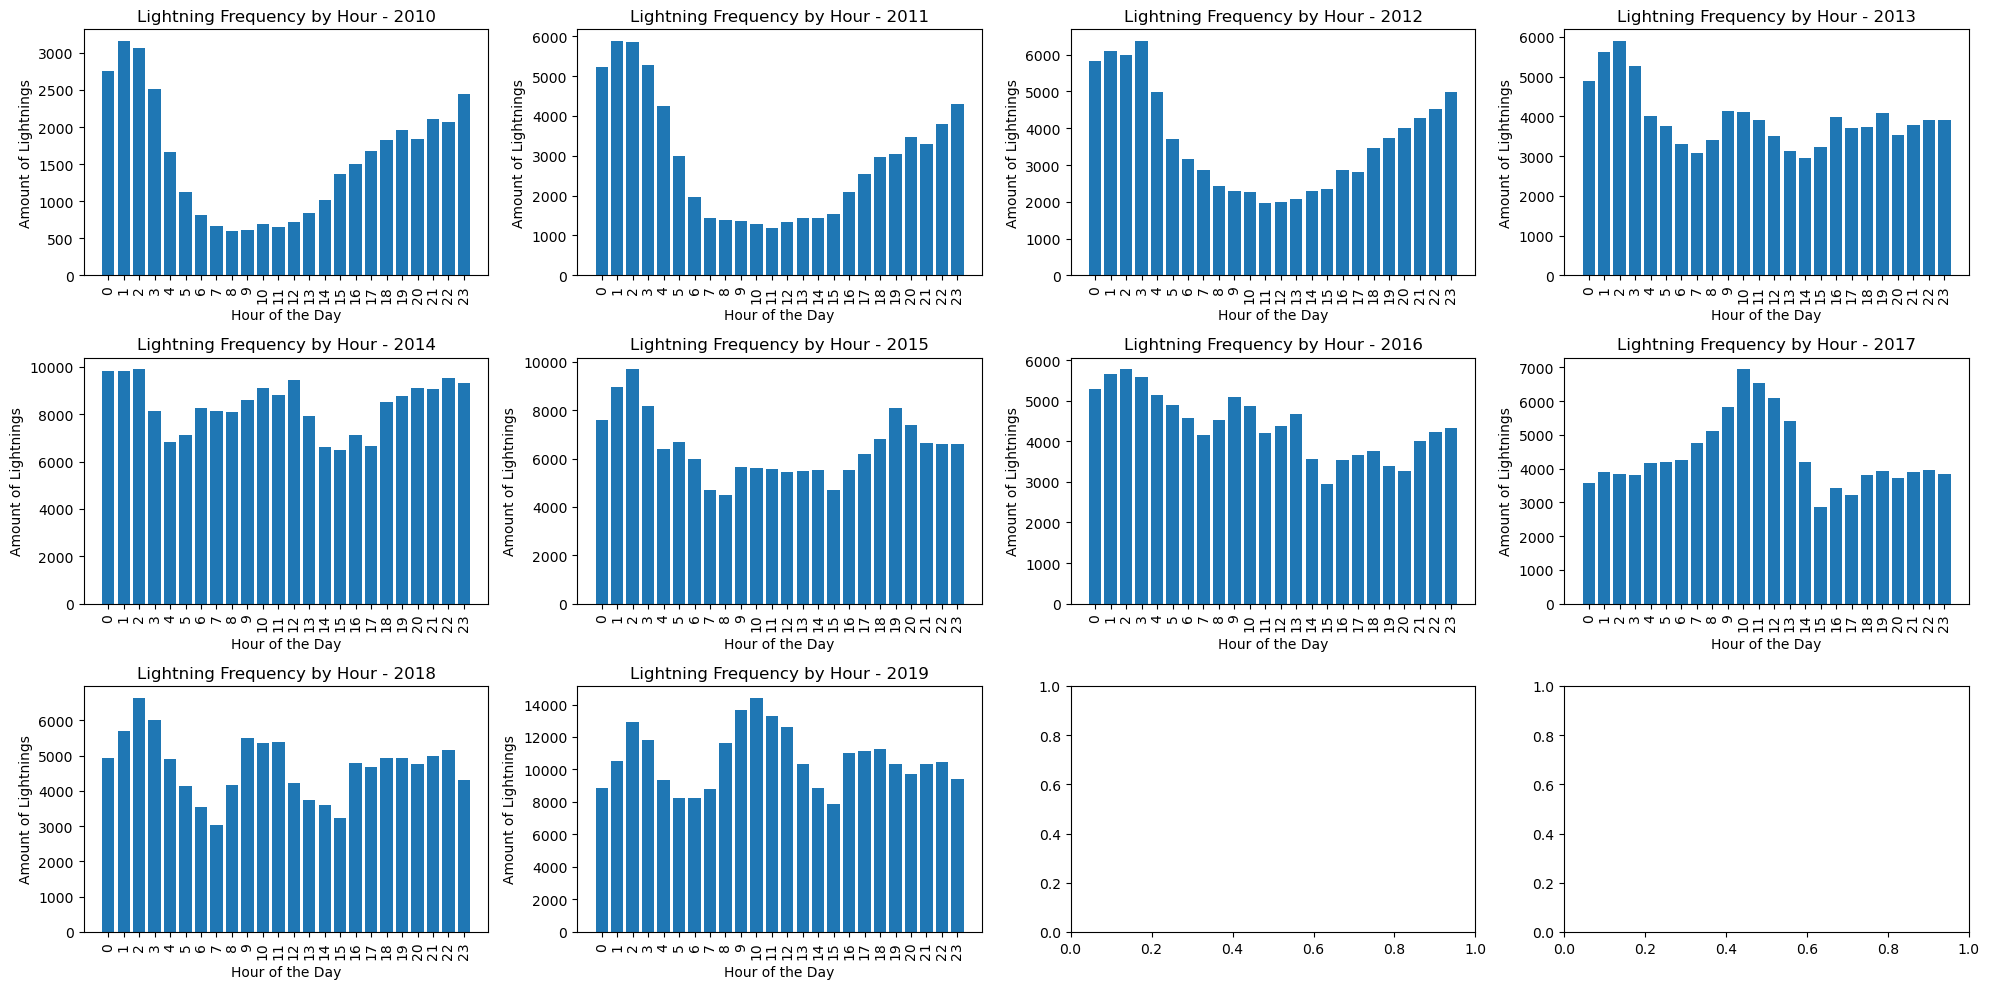

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# read in the dataframe
df = pd.read_csv("../relevant csvs/hourly lightning metrics with year.csv")

# group the dataframe by "Year"
grouped_df = df.groupby("Year")

# calculate the number of rows and columns needed for the grid layout
num_groups = len(grouped_df)
num_cols = math.ceil(math.sqrt(num_groups))
num_rows = math.ceil(num_groups / num_cols)

# create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

# loop over each group and create a subplot
for i, (year, group) in enumerate(grouped_df):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.bar(group["Hour"], group["Count"], width=0.8)
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Amount of Lightnings')
    ax.set_title(f"Lightning Frequency by Hour - {year}")
    ax.set_xticks(group['Hour'])
    ax.tick_params(axis='x', rotation=90)

# adjust the layout and save the figure
plt.tight_layout()
plt.savefig("../hourly lightnings/all_histograms.png")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# read in the dataframe
df = pd.read_csv("../relevant csvs/hourly tec.csv")

# group the dataframe by "Year"
grouped_df = df.groupby(['period','Hour'], as_index=False).agg({'tecUHR': 'mean'})

# calculate the number of rows and columns needed for the grid layout
num_groups = len(grouped_df)
num_cols = math.ceil(math.sqrt(num_groups))
num_rows = math.ceil(num_groups / num_cols)

# create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

# loop over each group and create a subplot
for i, (period, group) in enumerate(grouped_df):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.bar(group["Hour"], group["tecUHR"], width=0.8)
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Amount of Lightnings')
    ax.set_title(f"Lightning Frequency by Hour - {year}")
    ax.set_xticks(group['Hour'])
    ax.tick_params(axis='x', rotation=90)

# adjust the layout and save the figure
#plt.tight_layout()
#plt.savefig("../hourly lightnings/all_histograms.png")
plt.show()
